# Data Binning
Following script is used to bin the data and check stats of participants

In [1]:
import pandas as pd
import numpy as np
import json
import string

In [2]:
df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

df = df.sort_values(['SUB_ID'])

In [8]:
df

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
489,PITT,50002,1,1,16.77,1,Ambi,NaN,103.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
490,PITT,50003,1,1,24.45,1,R,NaN,124.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
491,PITT,50004,1,1,19.09,1,R,NaN,113.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
492,PITT,50005,1,1,13.73,2,R,NaN,119.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
493,PITT,50006,1,1,13.37,1,L,NaN,109.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
494,PITT,50007,1,1,17.78,1,R,NaN,110.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
495,PITT,50008,1,1,32.45,1,R,NaN,123.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
496,PITT,50009,1,1,33.86,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
497,PITT,50010,1,1,35.20,1,L,NaN,81.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
498,PITT,50011,1,1,16.93,1,L,NaN,111.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


### Reading scan json files and extracting scan parameters

In [9]:
# saving the file paths
!find /home1/varunk/data/ABIDE1/RawDataBIDs/ -name 'task-rest_bold.json' > scan_params_file.txt


In [10]:
# read the above created file paths:

with open('scan_params_file.txt', 'r') as f:
    scan_param_paths = f.read().split('\n')[0:-1]


In [11]:
scan_param_paths

['/home1/varunk/data/ABIDE1/RawDataBIDs/UM_1/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Caltech/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_c/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_d/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/UM_2/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_b/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/CMU_a/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/NYU/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Stanford/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/CMU_b/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_a/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_1/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/KKI/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/USM/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawD

In [12]:

# for json_path in scan_param_paths:   
#     with open(json_path, 'rt') as fp:
#         task_info = json.load(fp)

#     # Accessing the contents:

#     tr = task_info['RepetitionTime']
#     volumes = task_info['NumberofMeasurements']
#     xdim_mm, ydim_mm = task_info['PixelSpacing'].split('x')
#     zdim_mm = task_info['SpacingBetweenSlices']
    
#     xdim_voxels, ydim_voxels = task_info['AcquisitionMatrix'].split('x')
#     zdim_voxels = task_info['NumberOfSlices']

### Convention:
**DX_GROUP** : 1=Autism, 2= Control

**DSM_IV_TR** : 0=TD,1=Autism,2=Asperger's, 3= PDD-NOS, 4=Asperger's or PDD-NOS

**SEX** : 1=Male, 2=Female

In [13]:
SITES = np.unique(df.as_matrix(['SITE_ID']).squeeze())
data_frame = pd.DataFrame({
'SITE_NAME': [] ,
'TR': [],
'VOLUMES': [],
'xdim_mm': [],
'ydim_mm': [],
'zdim_mm': [],
'xdim_voxels': [],
'ydim_voxels': [],
'zdim_voxels': [],    
'NUM_AUT_DSM_V': [] , 
'NUM_AUT_MALE_DSM_V': [] ,
'NUM_AUT_FEMALE_DSM_V': [],
'NUM_AUT_AGE_lte12_DSM_V' : [],
'NUM_AUT_AGE_12_18_DSM_V' : [],
'NUM_AUT_AGE_18_24_DSM_V': [],
'NUM_AUT_AGE_24_34_DSM_V' :[],
'NUM_AUT_AGE_34_50_DSM_V' : [],
'NUM_AUT_AGE_gt50_DSM_V' : [],
'NUM_AUT_DSM_IV' : [],
'NUM_AUT_MALE_DSM_IV' : [],
'NUM_AUT_FEMALE_DSM_IV' : [],
'NUM_ASP_DSM_IV' : [],
'NUM_ASP_MALE_DSM_IV' : [],
'NUM_ASP_FEMALE_DSM_IV' : [],
'NUM_PDDNOS_DSM_IV' : [],
'NUM_PDDNOS_MALE_DSM_IV' : [],
'NUM_PDDNOS_FEMALE_DSM_IV' : [],
'NUM_ASP_PDDNOS_DSM_IV' : [],
'NUM_ASP_PDDNOS_MALE_DSM_IV' : [],
'NUM_ASP_PDDNOS_FEMALE_DSM_IV' : [],
'NUM_TD' : [],
'NUM_TD_MALE' : [],
'NUM_TD_FEMALE' : [],
'NUM_TD_AGE_lte12' : [],
'NUM_TD_AGE_12_18' : [],
'NUM_TD_AGE_18_24' : [],
'NUM_TD_AGE_24_34' : [],
'NUM_TD_AGE_34_50' : [],
'NUM_TD_AGE_gt50' : []
                       
})

In [14]:
# NUM_AUT = 
# df.loc[(df['DSM_IV_TR'] != 0) & (df['DSM_IV_TR'] != 1) & (df['DSM_IV_TR'] != 2) & (df['DSM_IV_TR'] != 3) & (df['DSM_IV_TR'] != 4)]


for SITE in SITES:
    NUM_AUT_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_MALE_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_FEMALE_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_AUT_AGE_lte12_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] <= 12) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_12_18_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 12) & (df['AGE_AT_SCAN'] <= 18) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_18_24_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 18) & (df['AGE_AT_SCAN'] <= 24) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_24_34_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 24) & (df['AGE_AT_SCAN'] <= 34) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_34_50_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 34) & (df['AGE_AT_SCAN'] <= 50) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_gt50_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 50 ) & (df['SITE_ID'] == SITE)].shape[0]


    NUM_AUT_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]


    NUM_ASP_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_PDDNOS_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_PDDNOS_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_PDDNOS_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_ASP_PDDNOS_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_PDDNOS_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_PDDNOS_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]



    NUM_TD = df.loc[(df['DX_GROUP'] == 2) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_MALE = df.loc[(df['DX_GROUP'] == 2) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_FEMALE = df.loc[(df['DX_GROUP'] == 2) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_TD_AGE_lte12 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] <= 12) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_12_18 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 12) & (df['AGE_AT_SCAN'] <= 18) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_18_24 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 18) & (df['AGE_AT_SCAN'] <= 24) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_24_34 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 24) & (df['AGE_AT_SCAN'] <= 34) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_34_50 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 34) & (df['AGE_AT_SCAN'] <= 50) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_gt50 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 50 ) & (df['SITE_ID'] == SITE)].shape[0]

    tr = 0
    volumes = 0
    xdim_mm = 0
    ydim_mm = 0
    zdim_mm = 0
    xdim_voxels = 0
    ydim_voxels = 0
    zdim_voxels = 0
    
    # Accessing scan details
    for json_path in scan_param_paths:
        extracted_site = json_path.split('/')[-2]
        
        if (SITE).lower() in (extracted_site).lower():    
            with open(json_path, 'rt') as fp:
                print('Site matched with ',json_path)
                task_info = json.load(fp)

    # Accessing the contents:

                tr = task_info['RepetitionTime']
                volumes = task_info['NumberofMeasurements']
                xdim_mm, ydim_mm = task_info['PixelSpacing'].split('x')
                zdim_mm = task_info['SpacingBetweenSlices']

                xdim_voxels, ydim_voxels = task_info['AcquisitionMatrix'].split('x')
                zdim_voxels = task_info['NumberOfSlices']
    
    
    _df = pd.DataFrame({
    'SITE_NAME': SITE ,
    'TR': tr ,
    'VOLUMES': volumes,
    'xdim_mm':xdim_mm,
    'ydim_mm':ydim_mm,
    'zdim_mm':zdim_mm,
    'xdim_voxels':xdim_voxels,
    'ydim_voxels':ydim_voxels,
    'zdim_voxels':zdim_voxels,
        
    'NUM_AUT_DSM_V': NUM_AUT_DSM_V , 
    'NUM_AUT_MALE_DSM_V': NUM_AUT_MALE_DSM_V ,
    'NUM_AUT_FEMALE_DSM_V': NUM_AUT_FEMALE_DSM_V,
    'NUM_AUT_AGE_lte12_DSM_V' : NUM_AUT_AGE_lte12_DSM_V,
    'NUM_AUT_AGE_12_18_DSM_V' : NUM_AUT_AGE_12_18_DSM_V,
    'NUM_AUT_AGE_18_24_DSM_V': NUM_AUT_AGE_18_24_DSM_V,
    'NUM_AUT_AGE_24_34_DSM_V' :NUM_AUT_AGE_24_34_DSM_V,
    'NUM_AUT_AGE_34_50_DSM_V' : NUM_AUT_AGE_34_50_DSM_V,
    'NUM_AUT_AGE_gt50_DSM_V' : NUM_AUT_AGE_gt50_DSM_V,
    'NUM_AUT_DSM_IV' : NUM_AUT_DSM_IV,
    'NUM_AUT_MALE_DSM_IV' : NUM_AUT_MALE_DSM_IV,
    'NUM_AUT_FEMALE_DSM_IV' : NUM_AUT_FEMALE_DSM_IV,
    'NUM_ASP_DSM_IV' : NUM_ASP_DSM_IV,
    'NUM_ASP_MALE_DSM_IV' : NUM_ASP_MALE_DSM_IV,
    'NUM_ASP_FEMALE_DSM_IV' : NUM_ASP_FEMALE_DSM_IV,
    'NUM_PDDNOS_DSM_IV' : NUM_PDDNOS_DSM_IV,
    'NUM_PDDNOS_MALE_DSM_IV' : NUM_PDDNOS_MALE_DSM_IV,
    'NUM_PDDNOS_FEMALE_DSM_IV' : NUM_PDDNOS_FEMALE_DSM_IV,
    'NUM_ASP_PDDNOS_DSM_IV' : NUM_ASP_PDDNOS_DSM_IV,
    'NUM_ASP_PDDNOS_MALE_DSM_IV' : NUM_ASP_PDDNOS_MALE_DSM_IV,
    'NUM_ASP_PDDNOS_FEMALE_DSM_IV' : NUM_ASP_PDDNOS_FEMALE_DSM_IV,
    'NUM_TD' : NUM_TD,
    'NUM_TD_MALE' : NUM_TD_MALE,
    'NUM_TD_FEMALE' : NUM_TD_FEMALE,
    'NUM_TD_AGE_lte12' : NUM_TD_AGE_lte12,
    'NUM_TD_AGE_12_18' : NUM_TD_AGE_12_18,
    'NUM_TD_AGE_18_24' : NUM_TD_AGE_18_24,
    'NUM_TD_AGE_24_34' : NUM_TD_AGE_24_34,
    'NUM_TD_AGE_34_50' : NUM_TD_AGE_34_50,
    'NUM_TD_AGE_gt50' : NUM_TD_AGE_gt50

    },index=[0],columns = [ 'SITE_NAME',
                            'TR',
                            'VOLUMES',
                            'xdim_mm',
                            'ydim_mm',
                            'zdim_mm',
                            'xdim_voxels',
                            'ydim_voxels',
                            'zdim_voxels',
                            'NUM_AUT_DSM_V',
                            'NUM_AUT_MALE_DSM_V',
                            'NUM_AUT_FEMALE_DSM_V',
                            'NUM_AUT_AGE_lte12_DSM_V',
                            'NUM_AUT_AGE_12_18_DSM_V',
                            'NUM_AUT_AGE_18_24_DSM_V',
                            'NUM_AUT_AGE_24_34_DSM_V',
                            'NUM_AUT_AGE_34_50_DSM_V',
                            'NUM_AUT_AGE_gt50_DSM_V',
                            'NUM_AUT_DSM_IV',
                            'NUM_AUT_MALE_DSM_IV',
                            'NUM_AUT_FEMALE_DSM_IV',
                            'NUM_ASP_DSM_IV',
                            'NUM_ASP_MALE_DSM_IV',
                            'NUM_ASP_FEMALE_DSM_IV',
                            'NUM_PDDNOS_DSM_IV',
                            'NUM_PDDNOS_MALE_DSM_IV',
                            'NUM_PDDNOS_FEMALE_DSM_IV',
                            'NUM_ASP_PDDNOS_DSM_IV',
                            'NUM_ASP_PDDNOS_MALE_DSM_IV',
                            'NUM_ASP_PDDNOS_FEMALE_DSM_IV',
                            'NUM_TD',
                            'NUM_TD_MALE',
                            'NUM_TD_FEMALE',
                            'NUM_TD_AGE_lte12',
                            'NUM_TD_AGE_12_18',
                            'NUM_TD_AGE_18_24',
                            'NUM_TD_AGE_24_34',
                            'NUM_TD_AGE_34_50',
                            'NUM_TD_AGE_gt50'])
    data_frame = data_frame.append(_df, ignore_index=True)[_df.columns.tolist()] 
    
    
#     df = pd.DataFrame(raw_data, columns = [])

# Sanity Check
# NUM_AUT_DSM_V.shape[0] + NUM_TD.shape[0]    
# df.loc[(df['DSM_IV_TR'] == 0)].shape[0] + NUM_AUT_DSM_V.shape[0] # Not exhaustive

Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Caltech/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/CMU_a/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/CMU_b/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/KKI/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_1/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_2/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_c/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_d/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_b/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_a/task-rest_bold.json


KeyboardInterrupt: 

In [ ]:
# 'MAX_MUN'.lower() in '/home1/varunk/data/ABIDE1/RawDataBIDs/MaxMun_a/task-rest_bold.json'.lower()

In [ ]:
_df

In [ ]:
data_frame

In [ ]:
# Save the csv file
data_frame.to_csv('demographics.csv')

## Group Stats
* The follwoing section checks the stats of participants lying in the ollwoing bins:
    * Autistic(DSM-IV), Males, Age <=18, Eyes Closed
    * Autistic(DSM-IV), Males, Age <=18, Eyes Open
    

In [15]:
# df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

# df = df.sort_values(['SUB_ID'])

# df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
# df_td_lt18_m_eyesopen;

# df_td_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 2)]
# df_td_lt18_m_eyesclosed;



In [16]:
# df_td_lt18_m_eyesopen;
# df_td_lt18_m_eyesclosed;

In [17]:
# Reading TR values
tr_path = '/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/tr_paths/tr_list.npy'
tr = np.load(tr_path)

In [18]:
np.unique(tr)

array([ 1.5  ,  1.667,  2.   ,  2.2  ,  2.5  ,  3.   ])

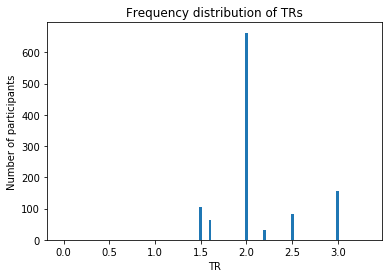

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')


In [20]:
np.unique(tr)


array([ 1.5  ,  1.667,  2.   ,  2.2  ,  2.5  ,  3.   ])

In [21]:
df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

df = df.sort_values(['SUB_ID'])

df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_td_lt18_m_eyesopen;

df_td_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_td_lt18_m_eyesclosed;

df_aut_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_aut_lt18_m_eyesopen;

df_aut_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_aut_lt18_m_eyesclosed;

In [22]:
df_td_lt18_m_eyesopen_sub_id = df_td_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()
df_td_lt18_m_eyesclosed_sub_id = df_td_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()

df_aut_lt18_m_eyesopen_sub_id = df_aut_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()
df_aut_lt18_m_eyesclosed_sub_id = df_aut_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()

In [23]:
import re
sub_id = []
atlas_paths = np.load('/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/atlas_paths/atlas_file_list.npy')

for path in atlas_paths:
    sub_id_extracted = re.search('.+_subject_id_(\d+)', path).group(1)
    sub_id.append(sub_id_extracted)

In [24]:
sub_id = list(map(int, sub_id))

In [25]:
# df_sub_id = df.as_matrix(['SUB_ID']).squeeze()

In [26]:
# Number of TD subjects with Age 12 to 18 

df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] >=12) &(df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_td_lt18_m_eyesopen.shape


(150, 74)

In [27]:
# Number of Autistic subjects with Age 12 to 18 
df_aut_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] >=12) &(df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_aut_lt18_m_eyesopen.shape

(105, 74)

In [28]:
# tr[np.where(df_sub_id == df_td_lt18_m_eyesopen_sub_id)]

In [29]:
# np.isin(sub_id,df_td_lt18_m_eyesopen_sub_id)

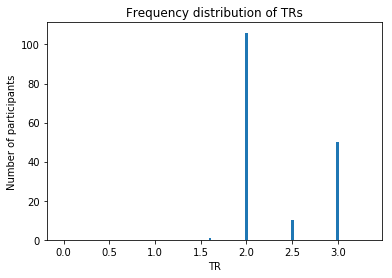

In [30]:
tr1 = tr[np.isin(sub_id, df_aut_lt18_m_eyesopen_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr1, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')




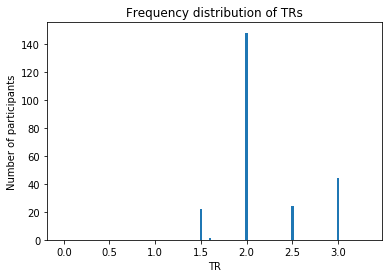

In [31]:
tr2 = tr[np.isin(sub_id, df_td_lt18_m_eyesopen_sub_id)]
bins = np.arange(0,3.5,0.1)
res = plt.hist(tr2, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')

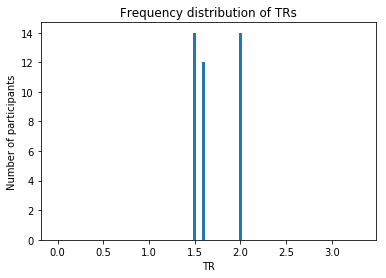

In [32]:
tr3 = tr[np.isin(sub_id, df_aut_lt18_m_eyesclosed_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr3, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')




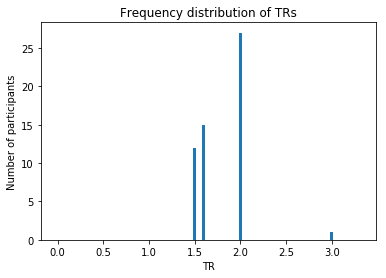

In [33]:
tr4 = tr[np.isin(sub_id, df_td_lt18_m_eyesclosed_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr4, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')



## AGE

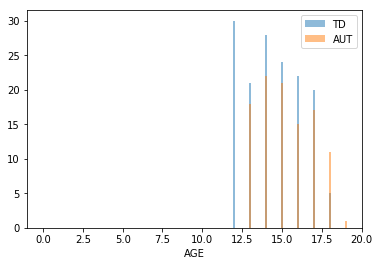

In [34]:
df_td_lt18_m_eyesopen_age = df_td_lt18_m_eyesopen.as_matrix(['AGE_AT_SCAN']).squeeze() 
df_td_lt18_m_eyesclosed_age = df_td_lt18_m_eyesclosed.as_matrix(['AGE_AT_SCAN']).squeeze()

df_aut_lt18_m_eyesopen_age = df_aut_lt18_m_eyesopen.as_matrix(['AGE_AT_SCAN']).squeeze()
df_aut_lt18_m_eyesclosed_age = df_aut_lt18_m_eyesclosed.as_matrix(['AGE_AT_SCAN']).squeeze()

bins = np.arange(0,20,1)
# res = plt.hist(df_td_lt18_m_eyesopen_age, rwidth=0.3, align='left')
# res2 = plt.hist(df_aut_lt18_m_eyesopen_age, rwidth=0.3, align='left', bins= bins)
# # plt.xticks([0,0.5,1,1.5,2,2.5,3])

# plt.xlabel('TR')
# plt.ylabel('Number of participants')
# plt.title('Frequency distribution of TRs')


# import random
# import numpy
from matplotlib import pyplot

# x = [random.gauss(3,1) for _ in range(400)]
# y = [random.gauss(4,2) for _ in range(400)]

# bins = numpy.linspace(-10, 10, 100)

pyplot.hist(df_td_lt18_m_eyesopen_age, alpha=0.5,bins=bins, label='TD',rwidth=0.1, align='left')
pyplot.hist(df_aut_lt18_m_eyesopen_age,alpha=0.5, bins=bins, label='AUT',rwidth=0.1,align='right')
pyplot.legend(loc='upper right')
pyplot.xlabel('AGE')
pyplot.show()

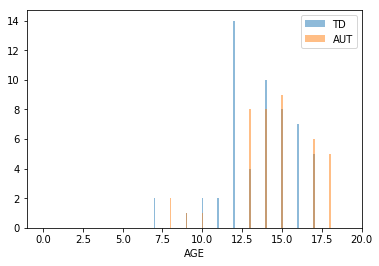

In [35]:

pyplot.hist(df_td_lt18_m_eyesclosed_age, alpha=0.5,bins=bins, label='TD',rwidth=0.1, align='left')
pyplot.hist(df_aut_lt18_m_eyesclosed_age,alpha=0.5, bins=bins, label='AUT',rwidth=0.1,align='right')
pyplot.legend(loc='upper right')
pyplot.xlabel('AGE')
pyplot.show()

### Box Plots:
https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

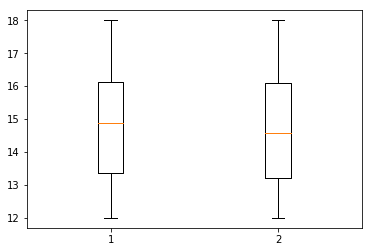

In [36]:
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([df_td_lt18_m_eyesopen_age,df_aut_lt18_m_eyesopen_age])


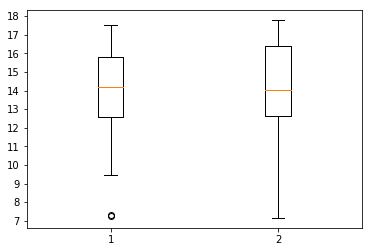

In [37]:
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([df_td_lt18_m_eyesclosed_age, df_aut_lt18_m_eyesclosed_age])

### Eyes Open vs Closed

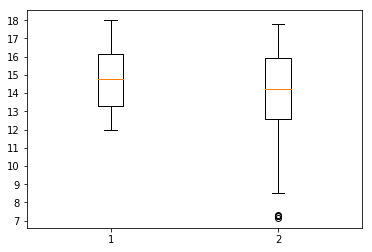

In [38]:
eyes_open_age = np.concatenate((df_td_lt18_m_eyesopen_age,df_aut_lt18_m_eyesopen_age))
eyes_closed_age = np.concatenate((df_td_lt18_m_eyesclosed_age,df_aut_lt18_m_eyesclosed_age))
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([eyes_open_age, eyes_closed_age])

### Stats: Differences in Ages of closed vs open

In [50]:
from scipy import stats
print(stats.ttest_ind(eyes_open_age,eyes_closed_age, equal_var = False))
print('Mean: ',np.mean(eyes_open_age), np.mean(eyes_closed_age))
print('Std: ',np.std(eyes_open_age), np.std(eyes_closed_age))

Ttest_indResult(statistic=3.0741555100729001, pvalue=0.0025712061303415756)
Mean:  14.8247094118 13.9759789474
Std:  1.74147449758 2.45817876091


#### Result:
Mean Age is **significantly different** in two groups. That may be the reason for discrepancies in regions. 

### Stats: Differences in TR of closed vs open

In [49]:
# stats.ttest_ind(eyes_open_age,eyes_closed_age, equal_var = False)

eyes_open_tr = np.concatenate((tr1,tr2))
eyes_closed_tr = np.concatenate((tr3,tr4))
print(stats.ttest_ind(eyes_open_tr,eyes_closed_tr, equal_var = False))
print('Mean: ',np.mean(eyes_open_tr), np.mean(eyes_closed_tr))
print('Std: ',np.std(eyes_open_tr), np.std(eyes_closed_tr))

Ttest_indResult(statistic=13.635287744840932, pvalue=2.5595564163248784e-32)
Mean:  2.24466502463 1.77904210526
Std:  0.454637360069 0.248275649686


#### Result:
TRs of two groups are also **significantly different**

## Age differences in AUT vs TD

### Eyes Open

In [46]:
print(stats.ttest_ind(df_aut_lt18_m_eyesopen_age, df_td_lt18_m_eyesopen_age, equal_var = False))
print('Mean: ',np.mean(df_aut_lt18_m_eyesopen_age), np.mean(df_td_lt18_m_eyesopen_age))
print('Std: ',np.std(df_aut_lt18_m_eyesopen_age), np.std(df_td_lt18_m_eyesopen_age))

Ttest_indResult(statistic=-0.56392638197286737, pvalue=0.57335267358997277)
Mean:  14.7515761905 14.8759026667
Std:  1.69009891739 1.77476142096


#### Result:
Age difference **not significant** for eyes open

### Eyes Closed

In [47]:
print(stats.ttest_ind(df_aut_lt18_m_eyesclosed_age, df_td_lt18_m_eyesclosed_age, equal_var = False))
print('Mean: ',np.mean(df_aut_lt18_m_eyesclosed_age),np.mean(df_td_lt18_m_eyesclosed_age))
print('Std: ',np.std(df_aut_lt18_m_eyesclosed_age),np.std(df_td_lt18_m_eyesclosed_age))

Ttest_indResult(statistic=-0.2086765109659752, pvalue=0.83524394640461863)
Mean:  13.91245 14.0221818182
Std:  2.61631077999 2.33537592139


#### Result: 
Age difference **not significant** for eyes closed

## Motion Parameters
https://www.jiscmail.ac.uk/cgi-bin/webadmin?A2=fsl;cda6e2ea.1112

Format: rot_x, rot_y, rot_z, trans_x, trans_y, trans_z


In [48]:
motion_params_npy = '/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/motion_params_paths/motion_params_file_list.npy'
mot_params_paths = np.load(motion_params_npy)


In [ ]:
in_file = mot_params_paths[0]

trans_x = [] 
trans_y = []
trans_z = []
rot_x = []
rot_y = []
rot_z = []

# for in_file in mot_params_paths:
with open(in_file) as f: 
    for line in f:
        line = line.split(' ')
        print(line)
        trans_x.append(float(line[6]))
        trans_y.append(float(line[8]))
        trans_z.append(float(line[10]))
        rot_x.append(float(line[0]))
        rot_y.append(float(line[2]))
        rot_z.append(float(line[4]))

In [ ]:
float('0.0142863')

In [ ]:
max(rot_y)

### Matching based on Volumes
* Volume bins
    * 100 - 150
    * 150 - 200
    * 200 - 250
    * 250 - 300

In [172]:
# Load demographics file
df_demographics = pd.read_csv('/home1/varunk/Autism-Connectome-Analysis-brain_connectivity/notebooks/demographics.csv')
# df_demographics
df_demographics_volumes = df_demographics.as_matrix(['SITE_NAME','VOLUMES']).squeeze()
df_demographics_volumes

array([['CALTECH', 150.0],
       ['CMU', 240.0],
       ['KKI', 156.0],
       ['LEUVEN_1', 250.0],
       ['LEUVEN_2', 250.0],
       ['MAX_MUN', 120.0],
       ['NYU', 180.0],
       ['OHSU', 82.0],
       ['OLIN', 210.0],
       ['PITT', 200.0],
       ['SBL', 200.0],
       ['SDSU', 180.0],
       ['STANFORD', 180.0],
       ['TRINITY', 150.0],
       ['UCLA_1', 120.0],
       ['UCLA_2', 120.0],
       ['UM_1', 300.0],
       ['UM_2', 300.0],
       ['USM', 240.0],
       ['YALE', 200.0]], dtype=object)

In [175]:
df_phenotype = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'
df_phenotype = df_phenotype.sort_values(['SUB_ID'])

volumes_bins = np.array([[0,150],[151,200],[201,250],[251,300]])

bins_volumes_AUT = []
bins_volumes_TD = []

for counter, _bin in enumerate(volumes_bins):
    df_demographics_volumes_selected_bin = df_demographics_volumes[np.where(np.logical_and((df_demographics_volumes[:,1] >= _bin[0]),(df_demographics_volumes[:,1] <= _bin[1])))]


    selected_AUT = pd.DataFrame()
    selected_TD = pd.DataFrame()
    for site in df_demographics_volumes_selected_bin:
        print(site[0])
        selected_AUT = pd.concat([selected_AUT,df_phenotype.loc[(df_phenotype['SEX'] == 1) & (df_phenotype['DSM_IV_TR'] == 1) & (df_phenotype['SITE_ID'] == site[0])]])  
        selected_TD = pd.concat([selected_AUT,df_phenotype.loc[(df_phenotype['SEX'] == 1) & (df_phenotype['DSM_IV_TR'] == 0) & (df_phenotype['SITE_ID'] == site[0])]])  

    bins_volumes_AUT.append(selected_AUT)
    bins_volumes_TD.append(selected_TD)

CALTECH
MAX_MUN
OHSU
TRINITY
UCLA_1
UCLA_2
KKI
NYU
PITT
SBL
SDSU
STANFORD
YALE
CMU
LEUVEN_1
LEUVEN_2
OLIN
USM
UM_1
UM_2


In [176]:
f = bins_volumes_AUT[0]
# f.loc[[2,3,4,5]]
f

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
2,CALTECH,51458,1,1,39.20,1,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1,22.80,1,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
8,CALTECH,51464,1,1,20.90,1,Ambi,NaN,101.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
9,CALTECH,51465,1,1,20.20,1,R,NaN,96.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
10,CALTECH,51466,1,1,27.60,1,Ambi,NaN,106.0,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
11,CALTECH,51467,1,1,23.40,1,R,NaN,93.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
12,CALTECH,51468,1,1,20.10,1,R,NaN,100.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
16,CALTECH,51472,1,1,17.50,1,Ambi,NaN,125.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
17,CALTECH,51473,1,1,21.20,1,R,NaN,-9999.0,-9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
18,CALTECH,51474,1,1,20.90,1,R,NaN,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [177]:
f.iloc[[2,3,4,5,7]]

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
8,CALTECH,51464,1,1,20.9,1,Ambi,NaN,101.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
9,CALTECH,51465,1,1,20.2,1,R,NaN,96.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
10,CALTECH,51466,1,1,27.6,1,Ambi,NaN,106.0,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
11,CALTECH,51467,1,1,23.4,1,R,NaN,93.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
16,CALTECH,51472,1,1,17.5,1,Ambi,NaN,125.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [178]:
# num_bins = 4
print('Range    ','TD ','AUT ','Ratio TD/AUT')
ratio = np.zeros((len(bins_volumes_AUT)))
for i in range(len(bins_volumes_AUT)):
    ratio[i] = bins_volumes_TD[i].shape[0]/bins_volumes_AUT[i].shape[0]
    print(volumes_bins[i],bins_volumes_TD[i].shape[0],bins_volumes_AUT[i].shape[0], ratio[i])

Range     TD  AUT  Ratio TD/AUT
[  0 150] 89 77 1.15584415584
[151 200] 110 90 1.22222222222
[201 250] 137 94 1.45744680851
[251 300] 69 48 1.4375


In [179]:
min_ratio = np.min(ratio)
min_index = np.argmin(ratio)

In [180]:
new_TD = np.zeros((len(bins_volumes_AUT)))
print('Range    ','TD ','AUT ')
for i in range(len(bins_volumes_AUT)):
    new_TD[i] = np.ceil(bins_volumes_AUT[i].shape[0] * min_ratio)
    print(volumes_bins[i],new_TD[i],bins_volumes_AUT[i].shape[0])

Range     TD  AUT 
[  0 150] 89.0 77
[151 200] 105.0 90
[201 250] 109.0 94
[251 300] 56.0 48


In [182]:
# Now loop over all the bins created and select the specific number of subjects randomly from each TD bin

TD_idx_list = []
selected_df_TD = pd.DataFrame()

for i in range(len(bins_volumes_TD)):
    idx = np.arange(len(bins_volumes_TD[i]))
    np.random.shuffle(idx)
    idx = idx[0:int(new_TD[i])]
    TD_idx_list.append(idx)
    selected_df_TD = pd.concat([selected_df_TD, bins_volumes_TD[i].iloc[idx]])
    
selected_df_TD= selected_df_TD.sort_values(['SUB_ID'])
    
    
    
#     print(idx)

In [184]:
# Sanity check to see of no subjects are repeated
# subid = selected_df_TD.sort_values(['SUB_ID']).as_matrix(['SUB_ID']).squeeze()
# len(np.unique(subid)) == len(subid)

True

In [185]:
# Sanity check to see of the number of subjects are same as expected
# len(subid) == (89 + 105 + 109 + 56)

True

In [189]:
#  Sanity check so that no subject index is repeated
# len(np.unique(TD_idx_list[3]))  == len(TD_idx_list[3] )

# sanity check to check the new number of TD subjects in each Volumes bin
# len(TD_idx_list[3]) == 56

In [191]:
selected_df_TD

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
489,PITT,50002,1,1,16.77,1,Ambi,NaN,103.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
490,PITT,50003,1,1,24.45,1,R,NaN,124.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
491,PITT,50004,1,1,19.09,1,R,NaN,113.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
493,PITT,50006,1,1,13.37,1,L,NaN,109.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
494,PITT,50007,1,1,17.78,1,R,NaN,110.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
495,PITT,50008,1,1,32.45,1,R,NaN,123.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
496,PITT,50009,1,1,33.86,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
497,PITT,50010,1,1,35.20,1,L,NaN,81.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
498,PITT,50011,1,1,16.93,1,L,NaN,111.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
499,PITT,50012,1,1,21.48,1,R,NaN,128.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


### Matching based on Age
* Age bins
    * 6 - 9
    * 9 -12
    * 12 - 15
    * 15 - 18
    


In [193]:
age_bins = np.array([[0,9],[9,12],[12,15],[15,18]])

bins_age_AUT = []
bins_age_TD = []

# for counter, _bin in enumerate(age_bins):



for age in age_bins:
    
    selected_AUT = pd.DataFrame()
    selected_TD = pd.DataFrame()

    
    print(age[0], age[1])
    selected_AUT = pd.concat([selected_AUT,df_phenotype.loc[(df_phenotype['SEX'] == 1) 
                                                            & (df_phenotype['DSM_IV_TR'] == 1)
                                                            & (df_phenotype['AGE_AT_SCAN'] > age[0])
                                                            & (df_phenotype['AGE_AT_SCAN'] <= age[1]) ]])  
    selected_TD = pd.concat([selected_TD,selected_df_TD.loc[(selected_df_TD['SEX'] == 1)
                                                            & (selected_df_TD['DSM_IV_TR'] == 0)
                                                            & (selected_df_TD['AGE_AT_SCAN'] > age[0])
                                                            & (selected_df_TD['AGE_AT_SCAN'] <= age[1]) ]])  

    bins_age_AUT.append(selected_AUT)
    bins_age_TD.append(selected_TD)

0 9
9 12
12 15
15 18


In [194]:
bins_age_TD[0]

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
976,USM,50453,2,0,8.7721,1,NaN,85.19,121.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1069,YALE,50564,2,0,7.6600,1,R,NaN,140.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [195]:
# num_bins = 4
print('Original data stats')
print('Age Range    ','TD ','AUT ','Ratio TD/AUT')
ratio = np.zeros((len(bins_age_TD)))
for i in range(len(bins_age_TD)):
    ratio[i] = bins_age_TD[i].shape[0]/bins_age_AUT[i].shape[0]
    print(age_bins[i],bins_age_TD[i].shape[0],bins_age_AUT[i].shape[0], ratio[i])

Age Range     TD  AUT  Ratio TD/AUT
[0 9] 2 15 0.133333333333
[ 9 12] 16 59 0.271186440678
[12 15] 25 85 0.294117647059
[15 18] 17 55 0.309090909091


In [168]:
min_ratio = np.min(ratio)
min_index = np.argmin(ratio)

In [169]:
new_TD = np.zeros((len(bins_age_AUT)))
print('Matched data stats')
print('Age Range    ','TD ','AUT ')
for i in range(len(bins_age_AUT)):
    new_TD[i] = np.ceil(bins_age_AUT[i].shape[0] * min_ratio)
    print(age_bins[i],new_TD[i],bins_age_AUT[i].shape[0])

Age Range     TD  AUT 
[0 9] 17.0 14
[ 9 12] 71.0 58
[12 15] 95.0 78
[15 18] 61.0 50


In [170]:
# Now loop over all the bins created and select the specific number of subjects randomly from each TD bin

TD_idx_list = []
selected_df_TD = pd.DataFrame()

for i in range(len(bins_age_TD)):
    idx = np.arange(len(bins_age_TD[i]))
    np.random.shuffle(idx)
    idx = idx[0:int(new_TD[i])]
    TD_idx_list.append(idx)
    selected_df_TD = pd.concat([selected_df_TD, bins_age_TD[i].iloc[idx]])
    
selected_df_TD = selected_df_TD.sort_values(['SUB_ID'])
    
    
    
#     print(idx)

In [215]:
selected_df_TD

# selected_df_TD.as_matrix(['SUB_ID']).squeeze()

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
489,PITT,50002,1,1,16.77,1,Ambi,NaN,103.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
490,PITT,50003,1,1,24.45,1,R,NaN,124.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
491,PITT,50004,1,1,19.09,1,R,NaN,113.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
493,PITT,50006,1,1,13.37,1,L,NaN,109.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
494,PITT,50007,1,1,17.78,1,R,NaN,110.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
495,PITT,50008,1,1,32.45,1,R,NaN,123.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
496,PITT,50009,1,1,33.86,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
497,PITT,50010,1,1,35.20,1,L,NaN,81.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
498,PITT,50011,1,1,16.93,1,L,NaN,111.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
499,PITT,50012,1,1,21.48,1,R,NaN,128.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [104]:
x = np.arange(10)
np.random.shuffle(x)

In [105]:
x

array([2, 0, 5, 6, 8, 3, 1, 9, 7, 4])

In [80]:
48 * min_ratio

55.480519480519483

In [ ]:
#     selected = selected.loc[(selected['SEX'] == 1) & (selected['DSM_IV_TR'] == 0) & (selected['SITE_ID'] == site[0]) & (selected['EYE_STATUS_AT_SCAN'] == 1)]  

In [196]:
selected;

In [44]:
df_phenotype.loc[(df_phenotype['SEX'] == 1) & (df_phenotype['DSM_IV_TR'] == 0) & (df_phenotype['SITE_ID'] == 'TRINITY') & (df_phenotype['EYE_STATUS_AT_SCAN'] == 1)]

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI


## Create a function to do volumes matching

In [225]:
def volumes_matching(volumes_bins, demographics_file_path, phenotype_file_path):
    # Load demographics file
    
#     demographics_file_path = '/home1/varunk/Autism-Connectome-Analysis-brain_connectivity/notebooks/demographics.csv'
#     phenotype_file_path = '/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv'
#     volumes_bins = np.array([[0,150],[151,200],[201,250],[251,300]])
    
    
    df_demographics = pd.read_csv(demographics_file_path)
    df_demographics_volumes = df_demographics.as_matrix(['SITE_NAME','VOLUMES']).squeeze()


    
    df_phenotype = pd.read_csv(phenotype_file_path) 
    df_phenotype = df_phenotype.sort_values(['SUB_ID'])

    

    bins_volumes_AUT_data = []
    bins_volumes_TD_data = []

    for counter, _bin in enumerate(volumes_bins):
        df_demographics_volumes_selected_bin = df_demographics_volumes[np.where(np.logical_and((df_demographics_volumes[:,1] >= _bin[0]),(df_demographics_volumes[:,1] <= _bin[1])))]


        selected_AUT = pd.DataFrame()
        selected_TD = pd.DataFrame()
        for site in df_demographics_volumes_selected_bin:
#             print(site[0])
            selected_AUT = pd.concat([selected_AUT,df_phenotype.loc[(df_phenotype['SEX'] == 1) & (df_phenotype['DSM_IV_TR'] == 1) & (df_phenotype['SITE_ID'] == site[0])]])  
            selected_TD = pd.concat([selected_AUT,df_phenotype.loc[(df_phenotype['SEX'] == 1) & (df_phenotype['DSM_IV_TR'] == 0) & (df_phenotype['SITE_ID'] == site[0])]])  

        bins_volumes_AUT_data.append(selected_AUT)
        bins_volumes_TD_data.append(selected_TD)
        
    selected_df_TD = matching(volumes_bins, bins_volumes_TD_data, bins_volumes_AUT_data)
#     sub_ids = selected_df_TD.as_matrix(['SUB_ID']).squeeze()
    selected_df_TD.to_csv('selected_TD.csv')
    return selected_df_TD

In [226]:
def matching(bins, bins_TD_data, bins_AUT_data):
    # num_bins = 4
    print('Original data stats')
    print('Range    ','TD ','AUT ','Ratio TD/AUT')
    ratio = np.zeros((len(bins_TD_data)))
    for i in range(len(bins_TD_data)):
        ratio[i] = bins_TD_data[i].shape[0]/bins_AUT_data[i].shape[0]
        print(bins[i],bins_TD_data[i].shape[0],bins_AUT_data[i].shape[0], ratio[i])

    min_ratio = np.min(ratio)
    min_index = np.argmin(ratio)

    new_TD = np.zeros((len(bins_TD_data)))
    print('Matched data stats')
    print('Range    ','TD ','AUT ')
    for i in range(len(bins_TD_data)):
        new_TD[i] = np.ceil(bins_AUT_data[i].shape[0] * min_ratio)
        print(bins[i],new_TD[i],bins_AUT_data[i].shape[0])

    # Now loop over all the bins created and select the specific number of subjects randomly from each TD bin

    TD_idx_list = []
    selected_df_TD = pd.DataFrame()

    for i in range(len(bins_TD_data)):
        idx = np.arange(len(bins_TD_data[i]))
        np.random.shuffle(idx)
        idx = idx[0:int(new_TD[i])]
        TD_idx_list.append(idx)
        selected_df_TD = pd.concat([selected_df_TD, bins_TD_data[i].iloc[idx]])

    selected_df_TD = selected_df_TD.sort_values(['SUB_ID'])

    return selected_df_TD


In [222]:
demographics_file_path = '/home1/varunk/Autism-Connectome-Analysis-brain_connectivity/notebooks/demographics.csv'
phenotype_file_path = '/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv'
volumes_bins = np.array([[0,150],[151,200],[201,250],[251,300]])

volumes_matching(volumes_bins, demographics_file_path, phenotype_file_path)


Original data stats
Range     TD  AUT  Ratio TD/AUT
[  0 150] 89 77 1.15584415584
[151 200] 110 90 1.22222222222
[201 250] 137 94 1.45744680851
[251 300] 69 48 1.4375
Matched data stats
Range     TD  AUT 
[  0 150] 89.0 77
[151 200] 105.0 90
[201 250] 109.0 94
[251 300] 56.0 48


,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
489,PITT,50002,1,1,16.77,1,Ambi,NaN,103.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
490,PITT,50003,1,1,24.45,1,R,NaN,124.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
491,PITT,50004,1,1,19.09,1,R,NaN,113.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
494,PITT,50007,1,1,17.78,1,R,NaN,110.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
495,PITT,50008,1,1,32.45,1,R,NaN,123.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
496,PITT,50009,1,1,33.86,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
497,PITT,50010,1,1,35.20,1,L,NaN,81.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
498,PITT,50011,1,1,16.93,1,L,NaN,111.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
499,PITT,50012,1,1,21.48,1,R,NaN,128.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
500,PITT,50013,1,1,9.33,1,R,NaN,86.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


# Recycle Bin

In [197]:
df_phenotype.loc[(df_phenotype['SITE_ID'] == 'TRINITY')];

In [25]:
df_demographics_volumes_selected_bin

array([['CALTECH', 150.0],
       ['TRINITY', 150.0]], dtype=object)

#### Extract the sub_id where volume lies in a particular bin

In [15]:
df_phenotype = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

# df_phenotype = df.as_matrix(['SITE_ID']).squeeze()
df = df.sort_values(['SUB_ID'])


df_td_lt18_m_eyesopen_vol_100_150 = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_td_lt18_m_eyesopen_vol_100_150;

In [16]:
np.unique(df_phenotype)

array(['CALTECH', 'CMU', 'KKI', 'LEUVEN_1', 'LEUVEN_2', 'MAX_MUN', 'NYU',
       'OHSU', 'OLIN', 'PITT', 'SBL', 'SDSU', 'STANFORD', 'TRINITY',
       'UCLA_1', 'UCLA_2', 'UM_1', 'UM_2', 'USM', 'YALE'], dtype=object)

In [ ]:
np.mean(eyes_open_tr), np.mean(eyes_closed_tr)

In [ ]:
df_td_lt18_m_eyesopen_age

In [ ]:
df_td_lt18_m_eyesopen_sub_id

In [ ]:
tr[637]

In [ ]:
'50003' in X[1]